<center><h1><font color='blue'> Continuous Flow Stirred Tank Reactors (Unsteady Flows) </font></h1></center>

In [165]:
# Import Python libraries for later use
from IPython.display import Javascript, display
from ipywidgets import widgets
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
import numpy as np
from IPython.display import HTML
import pandas as pd

<h2> <font color='purple'> Problem Statement </font></h2>

Consider a bar that opens at 5 PM and is open till 12 AM.  The bar is 500 $m^3$ in volume.  The inflow and outflow of air into the bar is 1000 $m^3/h$.  If 50 people smoke 2 cigarette per hour and each cigarette emits 800 $\mu$ g per cigarette of acetaldehyde.  The half-life of acetaldehyde is 23 hours.  What is the peak concentration of acetaldehyde in the bar?  How long does it take for the concentration of acetaldehyde to reduce to 10 $\mu$g/m$^3$.  Assume the initial concentration of acetaldehyde in the bar is zero.  Run the simulation for a period of 1 day (5 PM - 4:59 PM the next day).   

<h2> <font color= 'purple'> Conceptual Model </font> </h2>

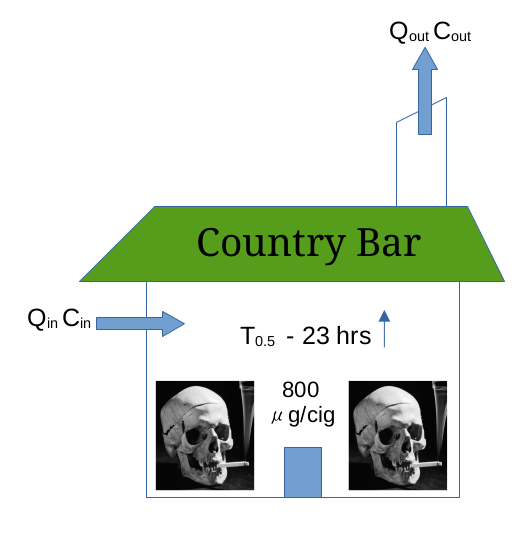

<h2> <font color= 'purple'> Governing Equations </font> </h2>

$
\begin{align}
& \left[ {\begin{array}{c}
    Rate \\
    Accumulation
  \end{array} } \right] = \left[ {\begin{array}{c}
    Rate  \\
    Inflow 
  \end{array} } \right] + 
  \left[ {\begin{array}{c}
    Rate  \\
    Outflow 
  \end{array} } \right] \pm
  \left[ {\begin{array}{c}
    Rate  \\
    Reactions 
  \end{array} } \right] &
\end{align}
$

<strong> <font color='blue'>Mass Balance Equation for Air </font></strong>


$
\begin{align}
& \frac{dV}{dt} = Q_{in} - Q_{out} = 0 \: \implies Q_{in} = Q_{out} = Q &
\end{align}
$

<strong> <font color='blue'>Mass Balance Equation for Acetaldehyde </font></strong>


$
\begin{align}
& V\frac{dC}{dt} = Q_{in}C_{in} - Q_{out}C_{out} + L_r (t) - kVC \quad \text{and} \quad C(t=0) = C_o &
\end{align}
$

<p>  We can rewrite the above equation as: </p>

$
\begin{align}
& \frac{dC}{dt} = \frac{Q_{in}C_{in}}{V}  + \frac{L_r(t)}{V} - \left(\frac{Q_{out}}{V} + k \right)C & \label{eqn:mdet1} &\\
& C(t=0) = C_o & \label{eqn:init}
\end{align}  
$


<strong> <font color='blue'>Time Dependent Acetaldehyde Production </font></strong>

$
\begin{align}
& L_r(t) = \left\{
\begin{array}{c} 
L_r\,  \quad \forall \quad 0 \le t \le t_{close} \\
0  \,  \quad \forall \quad t_{close} \le t \le 24  
\end{array} \right. & \label{eqn:loadact}
\end{align}
$

<h2> <font color= 'purple'> Model Parameters </font> </h2> 
<h4> Change the Parameters and Press the Run Model </h4>
<h4> Scroll to the bottom of the notebook to see the results </h4>

In [191]:
# Read the values
S = 50  # Average number of smokers in the bar each open hour
Cig = 5 # Average Number of cigarettes consumed by each smoker in the bar per hour
Mact = 800 # Amount of Acetaldehyde generated per cigaratte micrograms/cig
Q = 1000 # Air flowrate into and out of the bar due to ventilation (cubic m/h)
V = 500 # Volume of the bar in cubic meters
thalf = 23  # Half-life of Acetaldehyde in air (hours)
Co = 0 # Initial Concentration of Acetaldehyde in the bar (micrograms/cubic m)
Cin = 0 # Ambient atmospheric concentration of Acetaldehyde in the air entering the bar (micrograms/cubic m)
t1 = 7 # Number of Hours the bar is open.


<h2> <font color= 'purple'> Python Code for Solving the Material Balance </font> </h2>

In [192]:
# Perform pre-processing calculations
k = np.log(2)/thalf  # compute first order degradation rate
r = Cig *Mact*S # compute zero-order production rate when bar is open
print(r)

200000


In [193]:
# Function for computing acetaldehyde production over time
def rat(t,t1,Q,V,Cin,r,k):
    if(t <= t1):
        x = r
    else:
        x = 0
    return(x)

# Function to solve the ODE of Acetaldehyde
def mbe(t,C,t1,Q,V,Cin,r,k):
    r1 = rat(t,t1,Q,V,Cin,r,k)
    dcdt = Q*Cin/V + r1/V -(Q/V + k)*C
    return(dcdt)

In [194]:
# scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
#t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
# Solving the ODE
Ci = [Co]
tspan = (0,24)
teval = np.arange(0,24.1,0.1)
Cact = solve_ivp(fun=mbe,t_span=tspan,y0=Ci,method='LSODA',t_eval=teval,vectorized = False,args = [t1,Q,V,Cin,r,k])

<h2> <font color= 'purple'>Visualize Results </font> </h2>

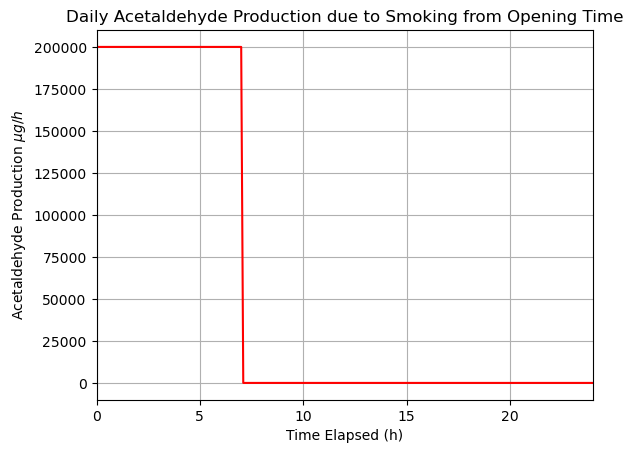

In [195]:
ratv = np.vectorize(rat)
prod = ratv(teval,t1,Q,V,Cin,r,k)
plt.plot(teval,prod,color='red')
plt.xlabel("Time Elapsed (h)")
plt.ylabel(r'Acetaldehyde Production $\mu g/h$')
plt.grid()
plt.xlim(0,24)
plt.title('Daily Acetaldehyde Production due to Smoking from Opening Time')
plt.show()

<h3> <font color = 'magenta'> Acetaldehyde Concentration in the Bar </font></h3>

In [196]:
C = Cact['y'][0]  # Extract the result

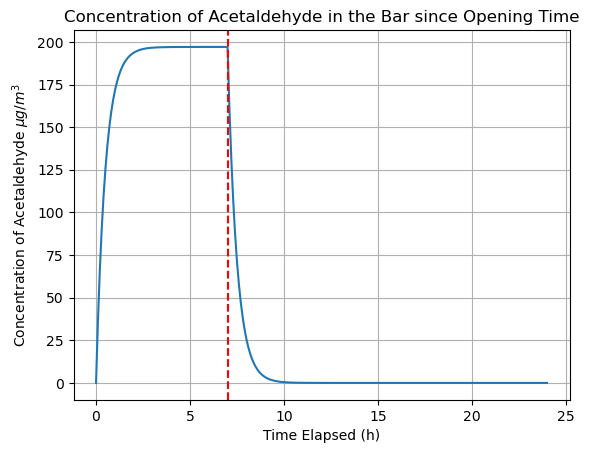

In [197]:
# Make plot
plt.plot(teval,C)
plt.xlabel('Time Elapsed (h)')
plt.ylabel(r'Concentration of Acetaldehyde $\mu g/m^3$')
plt.axvline(x=t1,color='red', linestyle='--')
plt.grid()
plt.title('Concentration of Acetaldehyde in the Bar since Opening Time')
plt.show()

<h3> <font color = 'magenta'> Other Results </font></h3>

In [198]:
HRT = V/Q
PRT = V/(Q + k*V)
tx = np.arange(0,t1,0.25)
Capprox = interp1d(teval,C,fill_value='extrapolate')
Copen = Capprox(tx)
Mopen = Q*Copen
Mtot = trapezoid(tx,Mopen)
idx = np.arange(0,len(teval),1)
data = {"Time":teval,"Conc":C,"idx":idx}
df = pd.DataFrame(data)
df = df.set_index('idx')
dfpost = df.loc[df["Time"] >= t1,["Time","Conc"]]
tapprox = interp1d(dfpost["Conc"],dfpost["Time"])
tppm = tapprox(1.80)  # 1.80 micrograms/cubic meter of CH3CHO is equal to 1 ppb at 25 C and 1 atm.

In [199]:
par = ["Hydraulic Residence Time (h)","Pollutant Residence Time (h)","Time to 1 ppb  (h)","Net Outflow Mass (mg)"]
val = [round(HRT,3),round(PRT,3),np.round(tppm,3),round(Mtot/1000,3)]
Fd = pd.DataFrame(val,par)
Fd.columns = ['Value']
print(Fd)

                               Value
Hydraulic Residence Time (h)   0.500
Pollutant Residence Time (h)   0.493
Time to 1 ppb  (h)             9.315
Net Outflow Mass (mg)         99.382


<h2> <font color= 'purple'> Points to Ponder </font> </h2>

<strong> Why does it take some time for the Acetaldehyde to fall to near zero values after the bar is closed? </strong>

<strong>  Does Reducing the number of smokers reduce the time it takes for the concentration of acetaldehyde to reach 1 ppb (assume inflow air concentration  = 0) </strong>

<strong>  By what percent does the hydraulic residence time (HRT) change if the flowrate is doubled from 1000 to 2000 $ m^3$/h. </strong>  

<strong>  How does a non-zero ambient outdoor air concentration affect the concentration of acetaldehyde in the bar? </strong>

<strong>  Which Input Parameter do you think has the biggest influence on the Net Mass of Acetaldehyde ? </strong> 

